In [4]:
import math
from System.Crawler.crawler import Crawler

crawler = Crawler(downloaded=True)
crawler.get_collection()
crawler.retrieve_all_docs()
print('wtf')

file reut2-002 docs are being processed and extracted to ./.misc/docs/reut2-002
file reut2-004 docs are being processed and extracted to ./.misc/docs/reut2-004
file reut2-008 docs are being processed and extracted to ./.misc/docs/reut2-008
file reut2-007 docs are being processed and extracted to ./.misc/docs/reut2-007
file reut2-015 docs are being processed and extracted to ./.misc/docs/reut2-015
file reut2-003 docs are being processed and extracted to ./.misc/docs/reut2-003
file reut2-006 docs are being processed and extracted to ./.misc/docs/reut2-006
file reut2-016 docs are being processed and extracted to ./.misc/docs/reut2-016
file reut2-012 docs are being processed and extracted to ./.misc/docs/reut2-012
file reut2-020 docs are being processed and extracted to ./.misc/docs/reut2-020
file reut2-000 docs are being processed and extracted to ./.misc/docs/reut2-000
file reut2-011 docs are being processed and extracted to ./.misc/docs/reut2-011
file reut2-010 docs are being processed 

After we have got all the documents lets check the number of distinct words

In [5]:
docs = crawler.retrieve_all_docs()
docs = list(map(lambda x: x[1], docs))
print(docs[0])


 5-MAR-1987 09:07:54.17
earn
uk




 
F
f0986reute
d f BC-JAGUAR-SEES-STRONG-GR   03-05 0115

JAGUAR SEES STRONG GROWTH IN NEW MODEL SALES
    LONDON, March 5 - Jaguar Plc <JAGR.L> is about to sell its
new XJ-6 model on the U.S. And Japanese markets and expects a
strong reception based on its success in the U.K., Chairman Sir
John Egan told a news conference.
    Commenting on an 11 pct growth in 1986 group turnover to
830.4 mln stg and pre-tax profits at 120.8 mln stg, slightly
below 1985's 121.3 mln, Egan said Jaguar aimed at an average
profit growth of 15 pct per year. However, the introduction of
the new model had kept this year's pre-tax profit down.
    Jaguar starts selling XJ-6 in the U.S. In May and plans to
sell 25,000 of its total 47,000 production there in 1987.
    U.S. Sales now account for 65 pct of total turnover,
finance director John Edwards said.
    A U.S. Price for the car has not been set yet, but Edwards
said the relatively high car prices in dollars of 

# Preprocess article

In [1]:
from System.Parser.query_parser import Parser, stemmatiztion, lemmatization
parser = Parser()

In [3]:
print(parser.preprocess('Hello I studied information retrieval this semester, and i quite like the information'))



['$hello$', '$studi$', '$inform$', '$retriev$', '$semest$', '$quit$', '$like$', '$inform$']


In [15]:
import functools 

sets = map(lambda x:set(parser.preprocess(x)) ,docs)
s = functools.reduce(lambda x,y: x|y, sets)
print(len(s))

149278


In [16]:
words = list(s)

print(words[:10])

['$antiwrinkl$', '$initialr$', '$thecibageigi$', '$issatisfi$', '$usabrazilcanada$', '$gasconglomer$', '$developmentstag$', '$ofbeef$', '$branchlast$', '$succ$']


# Size of words is 149278

we notice that the size of words in all the documents after preprocessing is small
therefore we cannot take the whole terms that are present in the documents or
therefore we can take the first 1000 to occur or lets say the most frequent thousand

## Most frequent or the first thousand to arrive

I am not sure which to take because keywords frequency in the documents dont matter as 
their frequency while queries 
I will take the first thousand that occur from random retrieval of documents

# Calculate vector

Here we are going to calculate the vector that represents the document

```zip(terms, frequencies)``` 

count_tf will provide a dictionary of keys as terms and values as raw tf values


In [3]:
from System.Indexer.indexer import count_tf, normalize

In [9]:
term_vector = count_tf(['hello','there','hello', 'byte', 'manz', 'man']);
print(term_vector)
term_vector = {'$germani$': 1}
print(term_vector.keys())
print(normalize(term_vector))

{'hello': 2, 'there': 1, 'byte': 1, 'manz': 1, 'man': 1}
dict_keys(['$germani$'])
{'$germani$': 1}


TypeError: must be real number, not str

# Normalize 

Here we will normalize the vector before inserting it in our term_tf index


In [77]:
import math
import numpy as np
def fill_term_matrix(path: str, collection):
    term_vector = count_tf(collection)
    L2norm = math.sqrt(functools.reduce(lambda x,y: (term_vector[x]**2 if type(x)  == type('str') else x) + term_vector[y]**2, term_vector.keys()))
    term_vector = dict([(i,term_vector[i]/L2norm) for i in term_vector.keys()])
    # self.term_doc_matrix.setdefault(path, term_vector)
    return term_vector

d = fill_term_matrix('s', ['hello','there','hello', 'byte', 'manz', 'man'])
print(d)
v = np.array(list(d.values()))
print(v)

print(np.dot(v,v))



{'hello': 0.7071067811865475, 'there': 0.35355339059327373, 'byte': 0.35355339059327373, 'manz': 0.35355339059327373, 'man': 0.35355339059327373}
[0.70710678 0.35355339 0.35355339 0.35355339 0.35355339]
0.9999999999999999


In [2]:
from System.Indexer.indexer import get_matrix

In [3]:
d  = {
    'a':{'he':1,'h3':3},
    'b':{'hi':1,'bye':2},
    'c':{'hi':1,'bye':1,'he':1},
    'd':{'zink':1}
      }
print(*get_matrix(d),sep='\n')


[[0, 1, 0, 3, 0], [0, 0, 1, 0, 2], [0, 1, 1, 0, 1], [1, 0, 0, 0, 0]]
dict_keys(['a', 'b', 'c', 'd'])


No handles with labels found to put in legend.


2 first dimensions
3 first dimensions


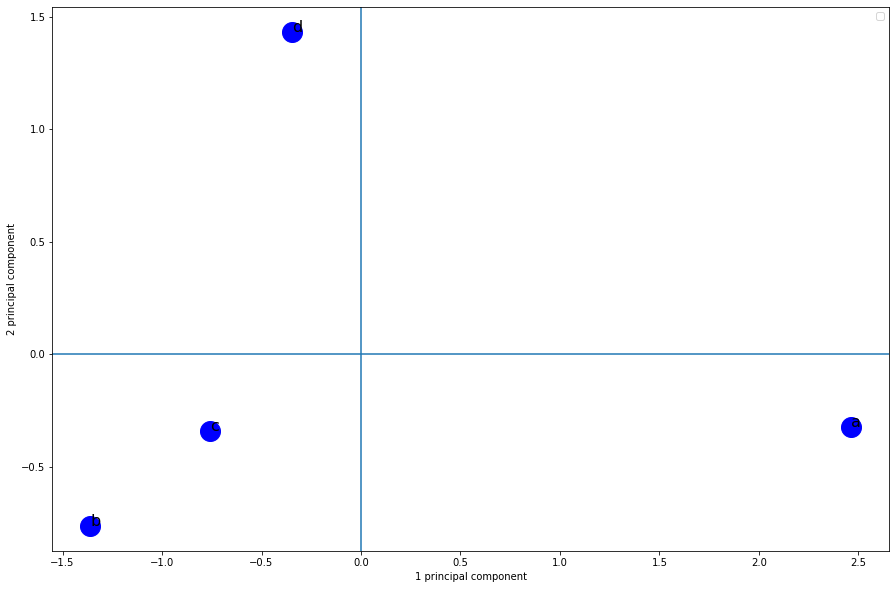

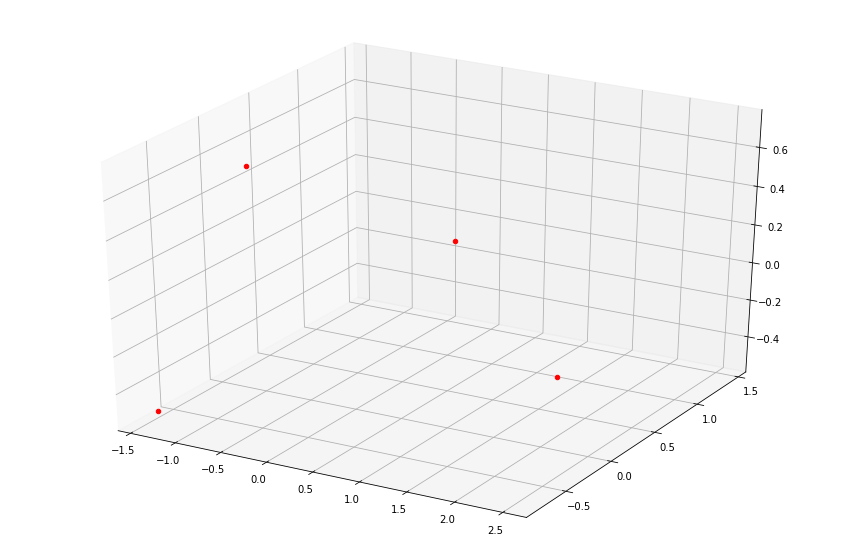

In [4]:
from System.Indexer.indexer import get_pca_decomposition
get_pca_decomposition(d)
